In [1]:
## Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
## Data collection and data processing
loan_data = pd.read_csv('C:/Users/Admin/Downloads/train_loan.csv')

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_data.shape

(614, 13)

In [7]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# dropping the missing value
loan_data = loan_data.dropna()

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


<AxesSubplot:xlabel='Married', ylabel='count'>

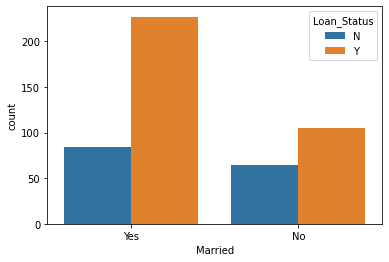

In [10]:
sns.countplot(data =loan_data,hue='Loan_Status',x ='Married')

<AxesSubplot:xlabel='Education', ylabel='count'>

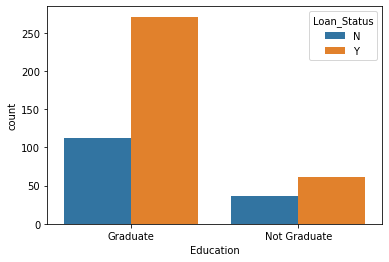

In [11]:
sns.countplot(data =loan_data,hue='Loan_Status',x ='Education')

In [12]:
## label encoding
loan_data = loan_data.replace({'Loan_Status':{'N':0,'Y':1},
                  'Married':{'Yes':1,'No':0},
                  'Dependents':{ '0':0,'1':1, '2':2, '3+':3},
                  'Education':{'Graduate':1, 'Not Graduate':0},
                  'Self_Employed':{'Yes':1,'No':0},
                  'Property_Area':{'Rural':1, 'Urban':2, 'Semiurban':3},
                  'Gender':{'Male':1, 'Female':2}})

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 52.5+ KB


In [14]:
loan_data=loan_data.set_index('Loan_ID',drop=True)

In [35]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [22]:
X = loan_data.drop(columns='Loan_Status')
y = loan_data['Loan_Status']

In [24]:
y

Loan_ID
LP001003    0
LP001005    1
LP001006    1
LP001008    1
LP001011    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 480, dtype: int64

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2,stratify=y)

In [29]:
## training the model Support vector model
classifier = svm.SVC(kernel='linear')


In [30]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [31]:
## Model evaluation
# accuracy score on training data
X_train_pred = classifier.predict(X_train)
training_data_accuracy_score = accuracy_score(X_train_pred,y_train)

In [32]:
# accuracy score on test data
X_test_pred = classifier.predict(X_test)
test_data_accuracy_score = accuracy_score(X_test_pred,y_test)

In [33]:
print(training_data_accuracy_score)
print(test_data_accuracy_score)

0.7662037037037037
0.7916666666666666


In [43]:
## Building the predictive system
input_data = (1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('The loan is declined')
else:
    print('The loan is approved')

[1]
The loan is approved


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
